# Convergence curves

In [101]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb

from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [78]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun
import mag_sphere_functions as msf

In [79]:
mypath = 'data/flightlines_grid_2100pts_100k/tfa_inversion/multiple_int_min6_int_max12_z0_min-100_z0_max200/'

In [80]:
with open(mypath+'inversion.pickle') as w:
        di = pickle.load(w)

In [81]:
with open('data/model.pickle') as w:
        model = pickle.load(w)

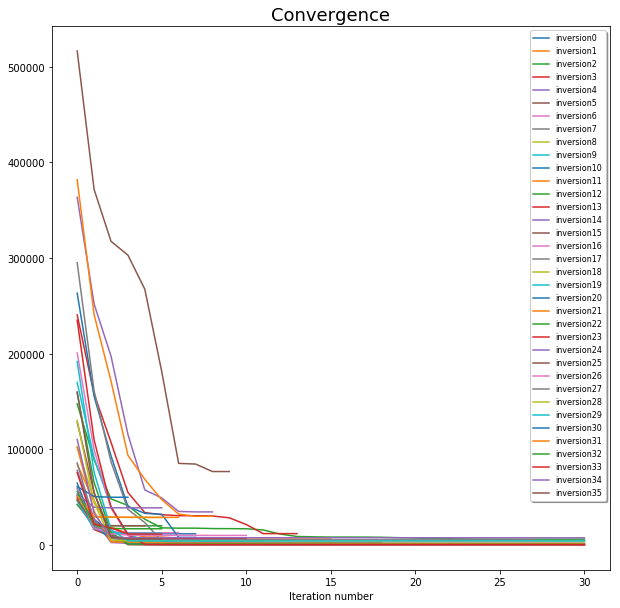

In [133]:
plt.figure(figsize=(10,10))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
for i, phi in enumerate(di['results']):
    plt.plot(phi[3], label='inversion%d' % (i))
plt.legend(loc=0, fontsize=8, shadow=bool, framealpha=1)

plt.savefig(mypath+'_tfa_convergence.png', dpi=300)
plt.show()

#img(filename=mypath+'diorama_tfa_convergence.png', width=400, height=400)

In [84]:
z0 = di['z0']
intensity = di['intensity']
z0_plot, int_plot = np.meshgrid(z0, intensity)
z0_plot = z0_plot.ravel()
int_plot = int_plot.ravel()

In [85]:
final_phi = []
for phi in di['results']:
    final_phi.append(phi[3][-1])
final_phi = np.asanyarray(final_phi)
matrix_phi = np.asarray(final_phi, dtype=np.float64).reshape(6,6)

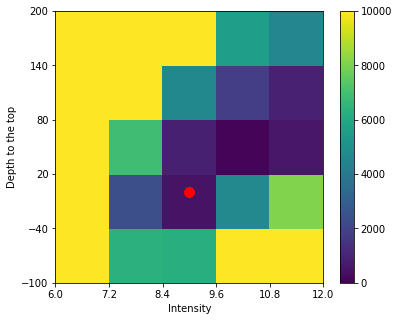

In [128]:
plt.figure(figsize=(6,5))
plt.pcolor(intensity, z0, matrix_phi, vmin=0, vmax=10000)
plt.plot(9., 0., 'ro', markersize=10)
plt.ylabel('Depth to the top')
plt.xlabel('Intensity')
plt.yticks(z0)
plt.xticks(intensity)
plt.colorbar()
plt.show()

# Inversion 13

/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


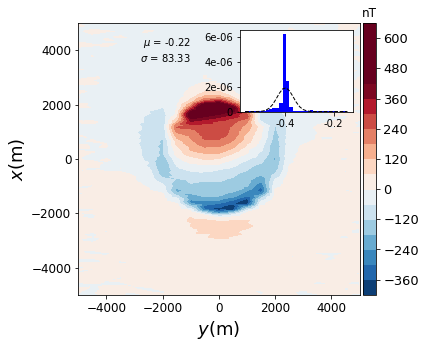

In [103]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(di['results'][13][-2]), vmax=np.min(di['results'][13][-2])*(-1))
plt.tricontourf(di['y'], di['x'], di['results'][13][-2], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(di['x']), np.max(di['x']))
plt.ylim(np.min(di['y']), np.max(di['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][13][-2])
std = np.std(di['results'][13][-2])
nbins=30
n, bins, patches = plt.hist(di['results'][13][-2],bins=nbins, normed=True, facecolor='blue')
plt.text(0.4, 0.96, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std), 
         horizontalalignment='right',
         verticalalignment='top',
         transform = ax.transAxes, fontsize=10)
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
mpl.m2km()
plt.show()

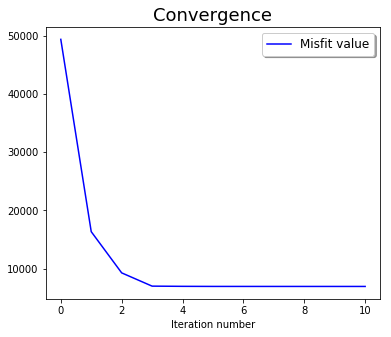

In [105]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(di['results'][13][3], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.show()

In [109]:
verts13 = mfun.plot_prisms(di['results'][13][2])
verts_true = mfun.plot_prisms(model['prisms'])

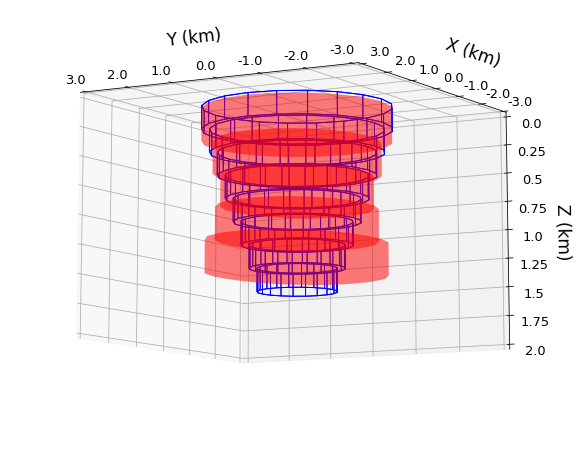

In [110]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts13, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(-10, 120)
ax.autoscale_view()

plt.show()

# Inversion 19

/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


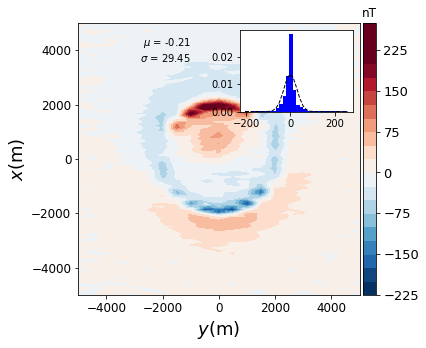

In [114]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(di['results'][14][-2]), vmax=np.min(di['results'][14][-2])*(-1))
plt.tricontourf(di['y'], di['x'], di['results'][14][-2], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(di['x']), np.max(di['x']))
plt.ylim(np.min(di['y']), np.max(di['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][14][-2])
std = np.std(di['results'][14][-2])
nbins=30
n, bins, patches = plt.hist(di['results'][14][-2],bins=nbins, normed=True, facecolor='blue')
plt.text(0.4, 0.96, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std), 
         horizontalalignment='right',
         verticalalignment='top',
         transform = ax.transAxes, fontsize=10)
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_residual.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_tfa_residual.png', width=1600, height=400)

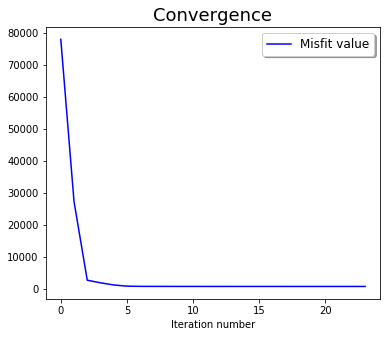

In [115]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(di['results'][14][3], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.show()

In [117]:
verts14 = mfun.plot_prisms(di['results'][14][2])

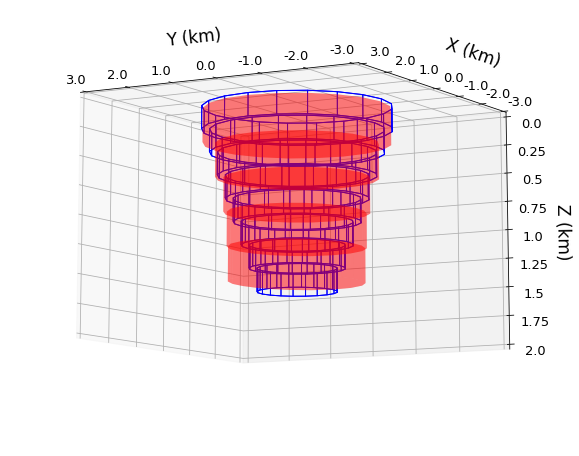

In [118]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts14, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(-10, 120)
ax.autoscale_view()

plt.show()

# Inversion 5

/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


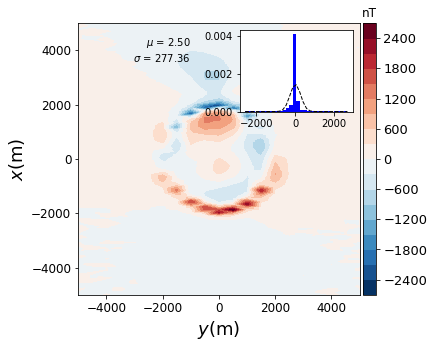

In [119]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(di['results'][5][-2]), vmax=np.min(di['results'][5][-2])*(-1))
plt.tricontourf(di['y'], di['x'], di['results'][5][-2], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(di['x']), np.max(di['x']))
plt.ylim(np.min(di['y']), np.max(di['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][5][-2])
std = np.std(di['results'][5][-2])
nbins=30
n, bins, patches = plt.hist(di['results'][5][-2],bins=nbins, normed=True, facecolor='blue')
plt.text(0.4, 0.96, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std), 
         horizontalalignment='right',
         verticalalignment='top',
         transform = ax.transAxes, fontsize=10)
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_residual.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_tfa_residual.png', width=1600, height=400)

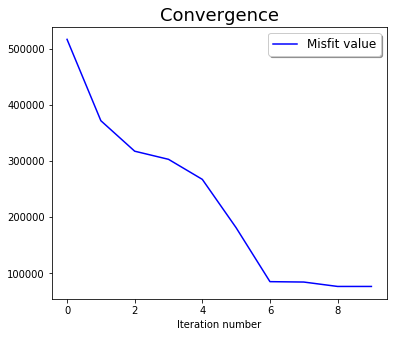

In [120]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(di['results'][5][3], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.show()

In [121]:
verts5 = mfun.plot_prisms(di['results'][5][2])

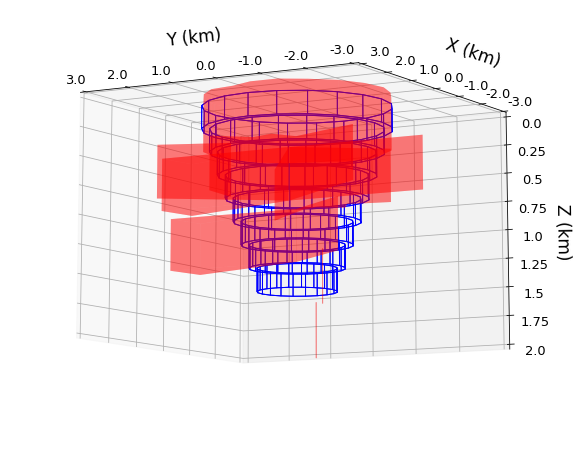

In [122]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts5, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(-10, 120)
ax.autoscale_view()

plt.show()

# Inversion 35

/home/leo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


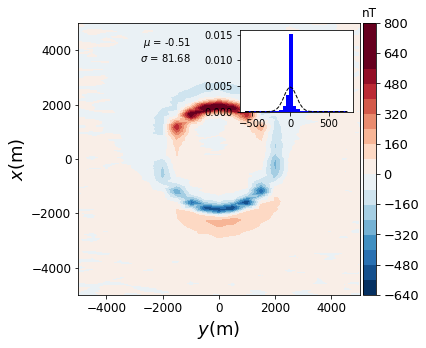

In [123]:
plt.figure(figsize=(6,5))
ax=mpl.subplot(1,1,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(di['results'][35][-2]), vmax=np.min(di['results'][35][-2])*(-1))
plt.tricontourf(di['y'], di['x'], di['results'][35][-2], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
plt.xlim(np.min(di['x']), np.max(di['x']))
plt.ylim(np.min(di['y']), np.max(di['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(di['results'][35][-2])
std = np.std(di['results'][35][-2])
nbins=30
n, bins, patches = plt.hist(di['results'][35][-2],bins=nbins, normed=True, facecolor='blue')
plt.text(0.4, 0.96, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std), 
         horizontalalignment='right',
         verticalalignment='top',
         transform = ax.transAxes, fontsize=10)
gauss = normpdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
#mpl.m2km()
plt.savefig(mypath+'kimberlite_tfa_residual.png', dpi=300, bbox_inches="tight")
#plt.show()
#img(filename=mypath+'kimberlite_tfa_residual.png', width=1600, height=400)

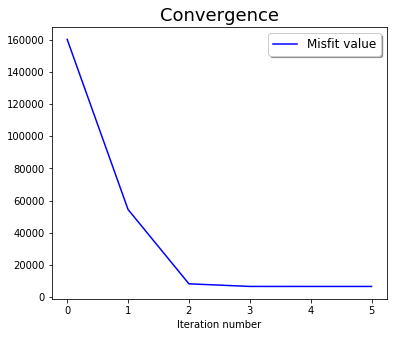

In [124]:
plt.figure(figsize=(6,5))
plt.title('Convergence', fontsize = 18)
plt.xlabel('Iteration number')
plt.plot(di['results'][35][3], 'b-', label='Misfit value')
plt.legend(loc=0, fontsize=12, shadow=bool, framealpha=1)
plt.show()

In [126]:
verts35 = mfun.plot_prisms(di['results'][35][2])

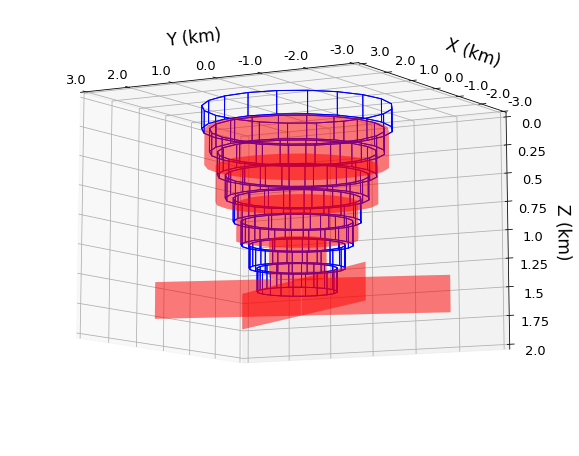

In [127]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts35, alpha=0.3, 
 facecolor='r', linewidths=0, edgecolors='r'))

ax.set_xlim(-3000, 3000, 100)
ax.set_ylim(-3000, 3000, 100)
ax.set_zlim(2000, 0, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(0, 2, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(-10, 120)
ax.autoscale_view()

plt.show()